In [3]:
pip install dcor --quiet

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install torch==2.2.0 --quiet

Note: you may need to restart the kernel to use updated packages.


In [5]:
import json
import math
import os
import pandas as pd
import torch
import time as time
from omegaconf import OmegaConf

In [6]:
pd.set_option('display.max_columns', None)

In [72]:
# Read pickles from the path specified in config.dest_file
config_path = "config_work.yaml"  # Replace with the path to your config file
config = OmegaConf.load(config_path)
df_encoded_path = os.path.join(config.dest_file, "df_encoded.csv")
# Load the DataFrame from the CSV file
df = pd.read_csv(df_encoded_path)

In [11]:
df.head(-5)

,surfaceProcessingLocationCavity,hotRunner,hotRunnerCost,manufacturingCost,mouldValidationCost,designTime,hourlyDesignCost,removedChassis,weightChassisProcessed,surfaceProcessingLocationChassis,removedCavity,numberOfCavities,weightCavityProcessed,weightMould,totalTransportationPercentage,percentageAircraft,percentageLorry,percentageTrain,percentageShip,totalDistance,transportCost,injectedMaterial_product,injectedMaterialCost,percentageRecycledMaterial,maxDepth,maxWallThickness,productVolume,materozzaVolume,nAnniProduzione,nProdottiAnno,materialDensity,tolerance,surfaceFinishing,cycleTime,machineCycleTime,maintenanceCost,productionCost,injectedMaterial_materozza,injectionMouldingProcess,memtiEngineValue,steelPrice,runnersType,mouldMaterialName,machineName,EUUSMacchina,CNMacchina,gateDiameter,setupTime,warmupTime,deliveryVolume,deliveryPeriod,mouldDesignCostDisplay,mouldTotalCost,Cost,human health - photochemical oxidation,ecosystem quality - terrestrial ecotoxicity,resources - mineral extraction,resources - non-renewable energy,ecosystem quality - terrestrial acidification & nutrification,resources - total,human health - ionising radiation,human health - respiratory effects (inorganics),human health - total,human health - human toxicity,ecosystem quality - aquatic ecotoxicity,climate change - climate change,human health - ozone layer depletion,ecosystem quality - land occupation,climate change - total,ecosystem quality - total
0,3.0,1.0,40000.0,40000.0,1500.0,40.0,65.0,0.20,6.6725,0.0,0.5,32.0,0.005495,6.677995,100.0,5.0,25.0,40.0,30.0,50.0,4000.0,3.0,1.0,0.0,5.0,1.0,5.0,0.0,1.0,1.0,0.00105,0.0,0.0,360.0,10.0,8000.0,12.0,3.0,2.0,0.0,0.0,1.0,6.0,7.0,4.0,4.0,1.0,15.0,30.0,10.0,2.0,2000.0,38500.0,56093.360588,0.000005,0.000885,0.000019,0.001452,0.000023,0.001471,0.000599,0.002724,0.004244,0.000916,0.000017,0.001938,1.483623e-07,0.000036,0.001938,0.000961
1,3.0,1.0,40000.0,25000.0,3000.0,70.0,50.0,0.15,6.6725,0.0,0.5,16.0,0.005495,6.677995,100.0,5.0,25.0,40.0,30.0,50.0,4000.0,3.0,1.0,0.0,5.0,1.0,5.0,0.0,1.0,1.0,0.00105,0.0,0.0,360.0,10.0,8000.0,12.0,3.0,2.0,0.0,0.0,1.0,6.0,7.0,4.0,4.0,1.0,15.0,30.0,10.0,2.0,2000.0,38500.0,43493.360588,0.000004,0.000805,0.000018,0.001366,0.000022,0.001384,0.000567,0.002586,0.004010,0.000853,0.000016,0.001825,1.379114e-07,0.000032,0.001825,0.000874
2,3.0,0.0,40000.0,40000.0,4500.0,100.0,65.0,0.20,6.6725,0.0,0.3,32.0,0.005495,6.677995,100.0,5.0,25.0,40.0,30.0,50.0,4000.0,3.0,1.0,0.0,5.0,1.0,5.0,0.0,1.0,1.0,0.00105,0.0,0.0,360.0,10.0,8000.0,12.0,3.0,2.0,0.0,0.0,1.0,6.0,7.0,4.0,4.0,1.0,15.0,30.0,10.0,2.0,2000.0,38500.0,102993.360588,0.000005,0.000885,0.000019,0.001452,0.000023,0.001470,0.000599,0.002723,0.004243,0.000916,0.000017,0.001938,1.483223e-07,0.000036,0.001938,0.000960
3,3.0,1.0,10000.0,25000.0,4500.0,70.0,50.0,0.18,6.6725,0.0,0.5,32.0,0.005495,6.677995,100.0,5.0,25.0,40.0,30.0,50.0,4000.0,3.0,1.0,0.0,5.0,1.0,5.0,0.0,1.0,1.0,0.00105,0.0,0.0,360.0,10.0,8000.0,12.0,3.0,2.0,0.0,0.0,1.0,6.0,7.0,4.0,4.0,1.0,15.0,30.0,10.0,2.0,2000.0,38500.0,44993.360588,0.000004,0.000853,0.000018,0.001414,0.000022,0.001432,0.000584,0.002666,0.004146,0.000891,0.000017,0.001891,1.439857e-07,0.000034,0.001891,0.000926
4,3.0,0.0,25000.0,25000.0,3000.0,40.0,65.0,0.18,6.6725,0.0,0.3,32.0,0.005495,6.677995,100.0,5.0,25.0,40.0,30.0,50.0,4000.0,3.0,1.0,0.0,5.0,1.0,5.0,0.0,1.0,1.0,0.00105,0.0,0.0,360.0,10.0,8000.0,12.0,3.0,2.0,0.0,0.0,1.0,6.0,7.0,4.0,4.0,1.0,15.0,30.0,10.0,2.0,2000.0,38500.0,67593.360588,0.000004,0.000852,0.000018,0.001414,0.000022,0.001432,0.000584,0.002666,0.004145,0.000890,0.000017,0.001890,1.439457e-07,0.000034,0.001890,0.000925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164138,2.0,0.0,40000.0,25000.0,1500.0,40.0,50.0,0.15,6.6725,3.0,0.3,1.0,0.005495,6.677995,100.0,5.0

In [12]:
df.describe()

,surfaceProcessingLocationCavity,hotRunner,hotRunnerCost,manufacturingCost,mouldValidationCost,designTime,hourlyDesignCost,removedChassis,weightChassisProcessed,surfaceProcessingLocationChassis,removedCavity,numberOfCavities,weightCavityProcessed,weightMould,totalTransportationPercentage,percentageAircraft,percentageLorry,percentageTrain,percentageShip,totalDistance,transportCost,injectedMaterial_product,injectedMaterialCost,percentageRecycledMaterial,maxDepth,maxWallThickness,productVolume,materozzaVolume,nAnniProduzione,nProdottiAnno,materialDensity,tolerance,surfaceFinishing,cycleTime,machineCycleTime,maintenanceCost,productionCost,injectedMaterial_materozza,injectionMouldingProcess,memtiEngineValue,steelPrice,runnersType,mouldMaterialName,machineName,EUUSMacchina,CNMacchina,gateDiameter,setupTime,warmupTime,deliveryVolume,deliveryPeriod,mouldDesignCostDisplay,mouldTotalCost,Cost,human health - photochemical oxidation,ecosystem quality - terrestrial ecotoxicity,resources - mineral extraction,resources - non-renewable energy,ecosystem quality - terrestrial acidification & nutrification,resources - total,human health - ionising radiation,human health - respiratory effects (inorganics),human health - total,human health - human toxicity,ecosystem quality - aquatic ecotoxicity,climate change - climate change,human health - ozone layer depletion,ecosystem quality - land occupation,climate change - total,ecosystem quality - total
count,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,1.641480e+05,164148.000000,164148.000000,164148.000000,1.641480e+05,1.641480e+05,164148.0,164148.0,164148.0,164148.0,164148.0,164148.000000,164148.0,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.0,164148.000000,164148.000000,164148.000000,164148.000000,164148.0,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.0,164148.000000,164148.0,164148.000000,164148.000000,164148.00000,164148.000000,164148.0,164148.000000,164148.0,164148.000000,164148.000000,164148.0,164148.0,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,164148.000000,1.641480e+05,164148.000000,164148.000000,164148.000000
mean,3.000000,0.195409,15862.270634,36722.073982,1606.586739,51.724541,50.532934,0.163086,6.672500e+00,0.769793,0.308290,2.740917,5.495000e-03,6.677995e+00,100.0,5.0,25.0,40.0,30.0,1133.808514,4000.0,3.455528,2.275922,0.461194,19.336300,1.319736,9.781782,0.319078,1.0,5381.814874,0.001102,0.147477,0.174690,360.0,14.347540,10185.344933,21.585642,3.501060,2.076979,0.0,0.426347,1.0,5.818901,9.061274,5.43275,4.115469,1.0,41.896764,30.0,6594.545654,3.644126,2000.0,38500.0,66584.271435,0.000040,0.003328,0.000024,0.030269,0.000185,0.030294,0.006191,0.014077,0.023236,0.002927,0.000106,0.019277,1.373095e-06,0.000173,0.019277,0.003792
std,0.554905,0.396516,10592.036270,12479.432960,505.081843,21.184073,2.776695,0.024592,7.269763e-12,1.186966,0.037572,6.279052,3.367976e-15,1.328275e-11,0.0,0.0,0.0,0.0,0.0,2229.091505,0.0,1.700838,2.623105,0.498493,29.477817,0.732969,9.831097,0.466121,0.0,15494.806796,0.000140,0.681254,0.768119,0.0,11.216855,6239.503454,11.208630,1.647026,0.525674,0.0,1.047509,0.0,1.404725,4.282591,3.29176,0.933774,0.0,38.959314,0.0,16912.852510,4.686030,0.0,0.0,15482.078690,0.000101,0.005769,0.000017,0.080793,0.000451,0.080809,0.015016,0.031402,0.051850,0.005354,0.000233,0.048485,3.047302e-06,0.000378,0.048485,0.006825
min,2.000000,0.000000,10000.000000,25000.000000,1500.000000,40.000000,50.000000,0.150000,6.672500e+00,0.000000,0.300000,1.000000,5.495000e-03,6.677995e+00,100.0,5.0,25.0,40.0,30.0,50.000000,4000.0,0.000000,1.000000,0.000000,5.000000,1.000000,5.000000,0.000000,1.0,1.000000,0.000920,0.000000,0.000000,360.0,10.000000,8000.000000,12.000000,0.000000,1.000000,0.0,0.000000,1.0,2.000000,2.000000,0.00

In [13]:
df.columns

Index(['surfaceProcessingLocationCavity', 'hotRunner', 'hotRunnerCost',
       'manufacturingCost', 'mouldValidationCost', 'designTime',
       'hourlyDesignCost', 'removedChassis', 'weightChassisProcessed',
       'surfaceProcessingLocationChassis', 'removedCavity', 'numberOfCavities',
       'weightCavityProcessed', 'weightMould', 'totalTransportationPercentage',
       'percentageAircraft', 'percentageLorry', 'percentageTrain',
       'percentageShip', 'totalDistance', 'transportCost',
       'injectedMaterial_product', 'injectedMaterialCost',
       'percentageRecycledMaterial', 'maxDepth', 'maxWallThickness',
       'productVolume', 'materozzaVolume', 'nAnniProduzione', 'nProdottiAnno',
       'materialDensity', 'tolerance', 'surfaceFinishing', 'cycleTime',
       'machineCycleTime', 'maintenanceCost', 'productionCost',
       'injectedMaterial_materozza', 'injectionMouldingProcess',
       'memtiEngineValue', 'steelPrice', 'runnersType', 'mouldMaterialName',
       'machineName',

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

In [15]:
# Correct way to select and convert multiple columns to string
columns_to_convert = ['surfaceProcessingLocationCavity', 'surfaceProcessingLocationChassis', 
                      'injectedMaterial_product', 'injectedMaterial_materozza', 
                      'injectionMouldingProcess','memtiEngineValue', 'steelPrice', 
                      'runnersType', 'mouldMaterialName','machineName', 
                      'EUUSMacchina', 'CNMacchina']

#df[columns_to_convert] = df[columns_to_convert].astype(float)
#df[df.columns] = df[df.columns].astype(str)

In [16]:
df_encoded = df

In [17]:
import dcor
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import Parallel, delayed

# Function to compute distance correlation for a pair of columns
def compute_distance_correlation(col1, col2):
    return dcor.distance_correlation(col1, col2)

# Function to calculate distance correlation matrix using parallel processing
def distance_correlation_matrix_parallel(df, n_jobs=-1):
    num_vars = df.shape[1]
    corr_matrix = np.zeros((num_vars, num_vars))
    
    results = Parallel(n_jobs=n_jobs)(
        delayed(compute_distance_correlation)(df.iloc[:, i].values, df.iloc[:, j].values)
        for i in range(num_vars) for j in range(num_vars)
    )
    
    # Fill the correlation matrix
    for idx, (i, j) in enumerate([(i, j) for i in range(num_vars) for j in range(num_vars)]):
        corr_matrix[i, j] = results[idx]
    
    return corr_matrix

# Function to filter variables by distance correlation threshold
def filter_variables_by_distance_correlation_parallel(df, threshold=0.43, n_jobs=-1):
    corr_matrix = distance_correlation_matrix_parallel(df, n_jobs=n_jobs)
    filtered_corr_matrix = np.where(corr_matrix >= threshold, corr_matrix, 0)
    filtered_corr_df = pd.DataFrame(filtered_corr_matrix, index=df.columns, columns=df.columns)
    return filtered_corr_df


In [ ]:
#filtered_corr_df = filter_variables_by_distance_correlation_parallel(df_encoded, threshold=0.43, n_jobs=-1)

In [ ]:
#filtered_corr_df.to_csv(os.path.join(config.dest_file, "filtered_corr_df.csv"), index=True)

In [29]:
filtered_corr_df = pd.read_csv(os.path.join(config.dest_file, "filtered_corr_df.csv"), index_col=0)

In [26]:
filtered_corr_df = filtered_corr_df.loc[(filtered_corr_df != 0).any(axis=1), (filtered_corr_df != 0).any(axis=0)]

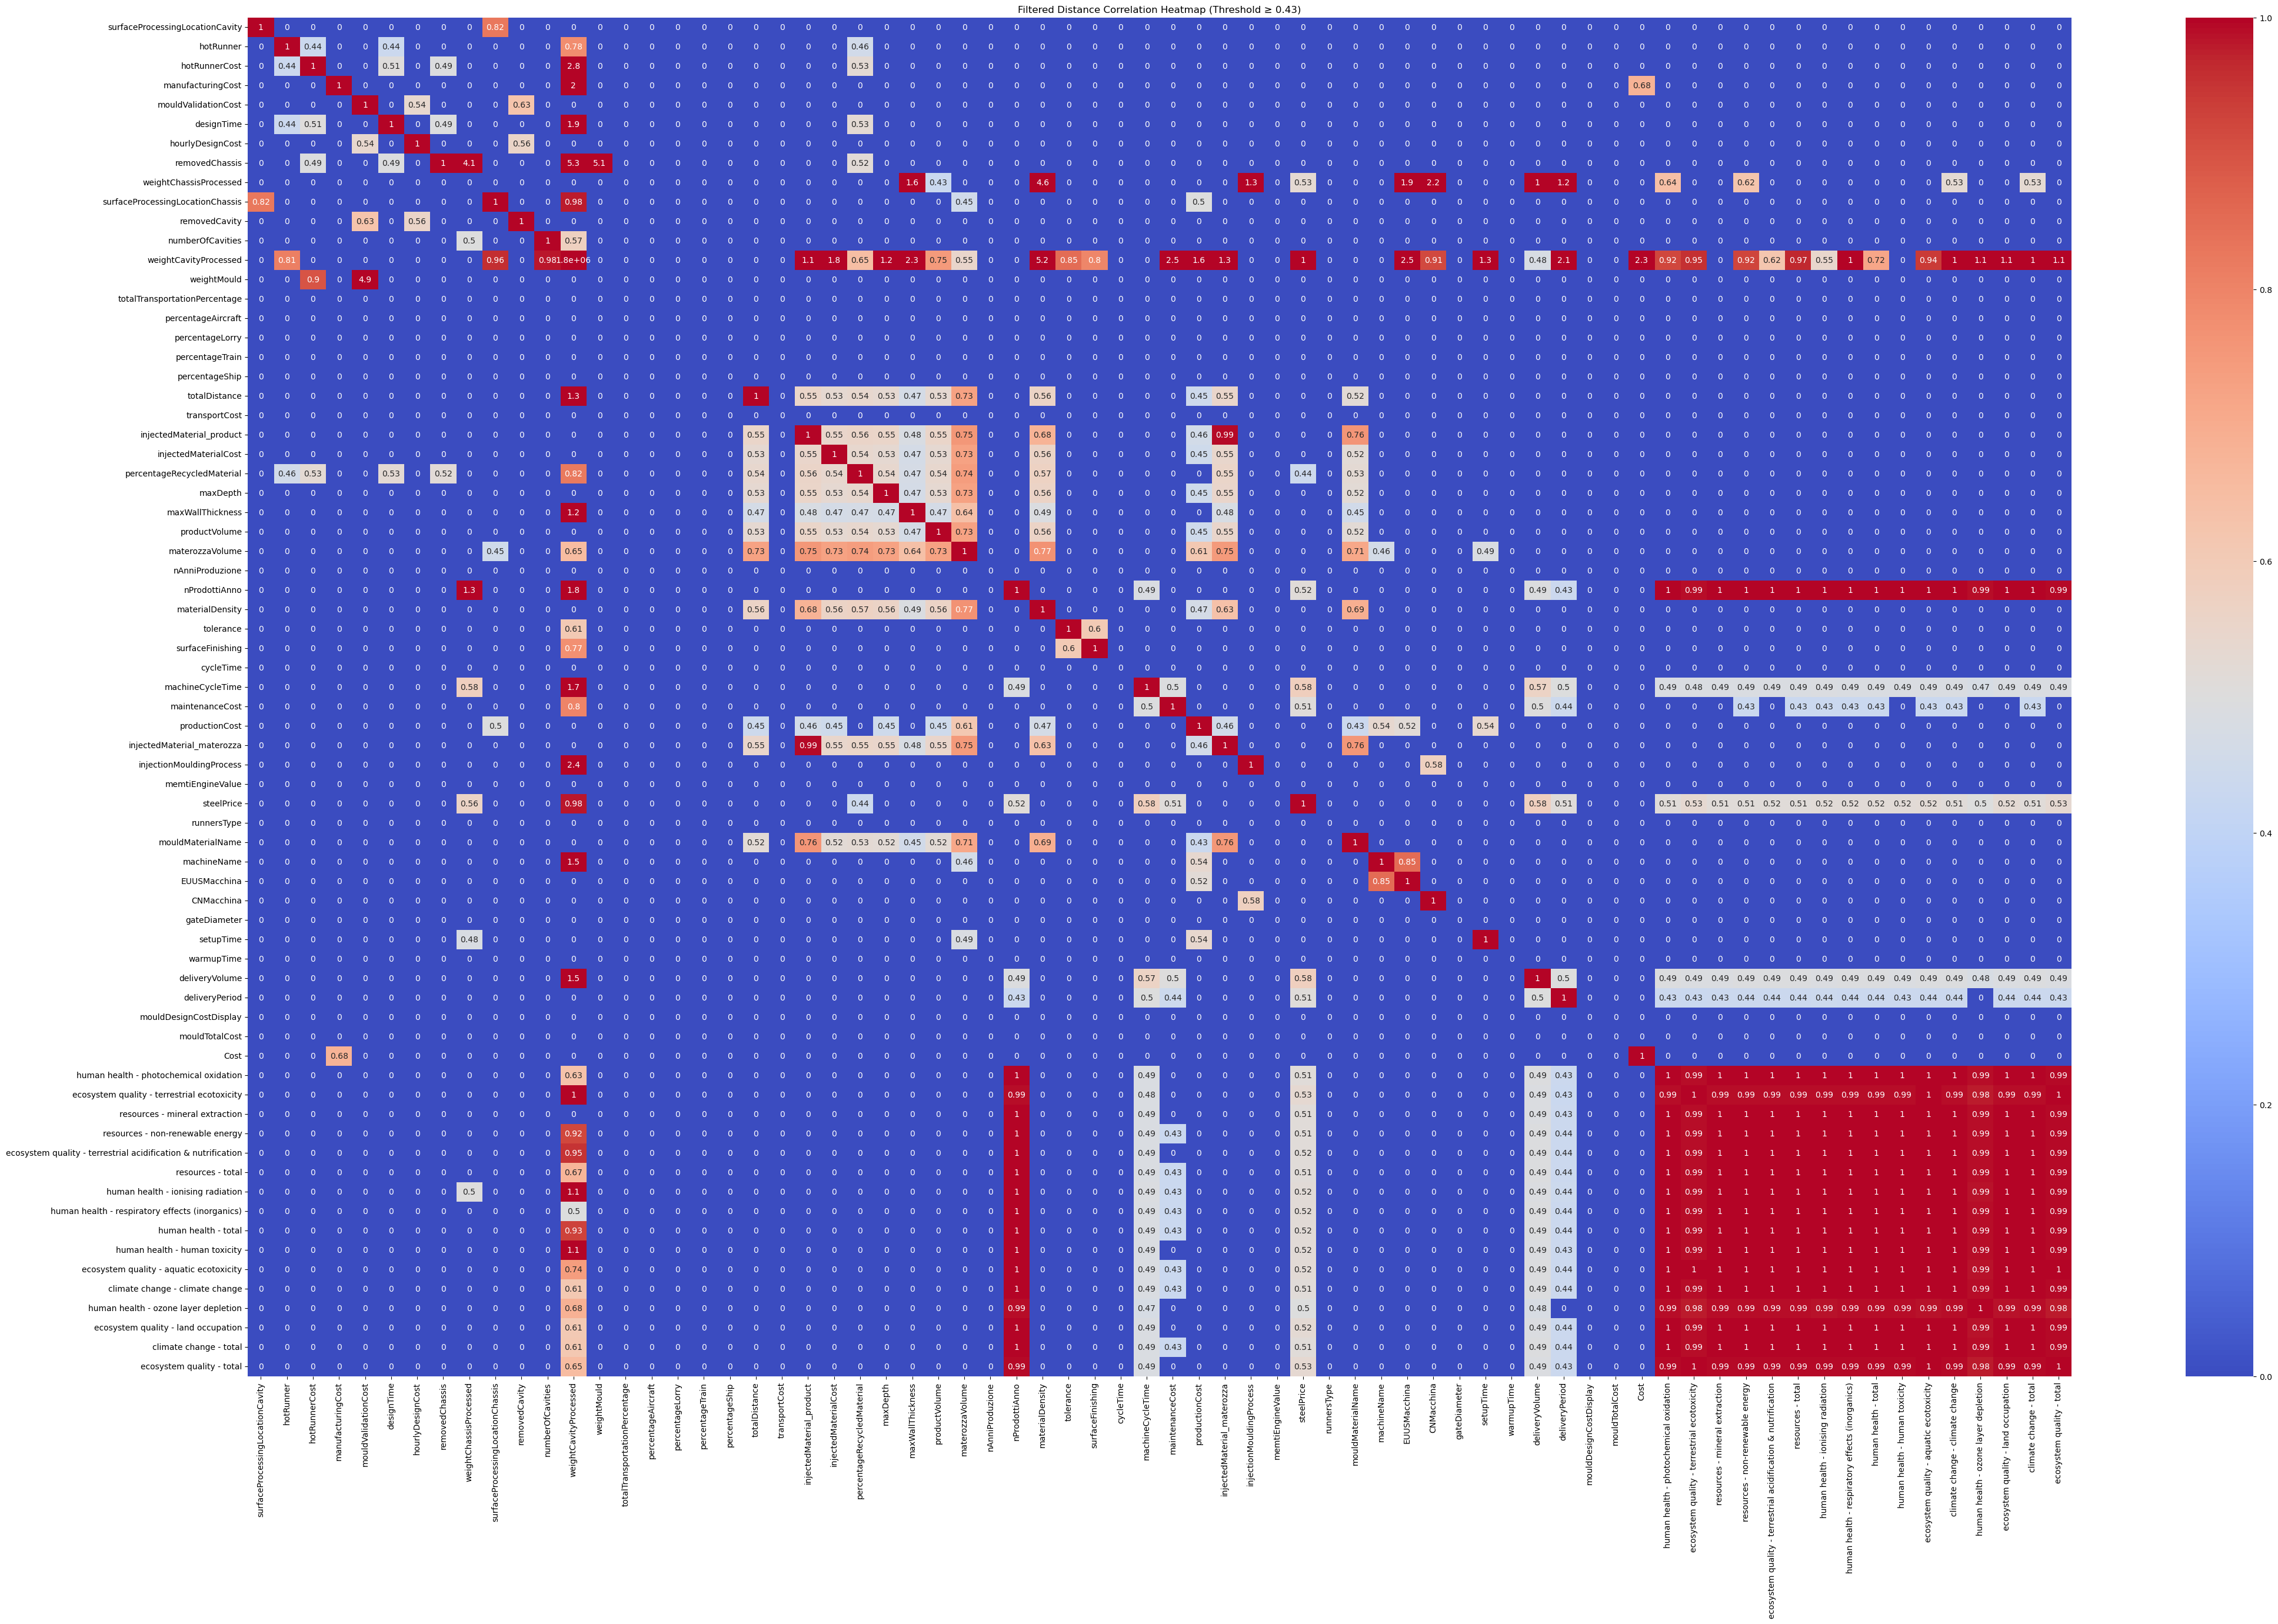

In [30]:
# Plot the filtered heatmap
plt.figure(figsize=(50, 30))
sns.heatmap(filtered_corr_df, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title("Filtered Distance Correlation Heatmap (Threshold ≥ 0.43)")
plt.show()

In [31]:
feature_column = ['surfaceProcessingLocationCavity', 'hotRunner', 'hotRunnerCost',
       'manufacturingCost', 'mouldValidationCost', 'designTime',
       'hourlyDesignCost', 'removedChassis', 'weightChassisProcessed',
       'surfaceProcessingLocationChassis', 'removedCavity', 'numberOfCavities',
       'weightCavityProcessed', 'weightMould', 'totalTransportationPercentage',
       'percentageAircraft', 'percentageLorry', 'percentageTrain',
       'percentageShip', 'totalDistance', 'transportCost',
       'injectedMaterial_product', 'injectedMaterialCost',
       'percentageRecycledMaterial', 'maxDepth', 'maxWallThickness',
       'productVolume', 'materozzaVolume', 'nAnniProduzione', 'nProdottiAnno',
       'materialDensity', 'tolerance', 'surfaceFinishing', 'cycleTime',
       'machineCycleTime', 'maintenanceCost', 'productionCost',
       'injectedMaterial_materozza', 'injectionMouldingProcess',
       'memtiEngineValue', 'steelPrice', 'runnersType', 'mouldMaterialName',
       'machineName', 'EUUSMacchina', 'CNMacchina', 'gateDiameter',
       'setupTime', 'warmupTime', 'deliveryVolume', 'deliveryPeriod',
       'mouldDesignCostDisplay', 'mouldTotalCost']

target_column = ['Cost',
       'human health - photochemical oxidation',
       'ecosystem quality - terrestrial ecotoxicity',
       'resources - mineral extraction', 'resources - non-renewable energy',
       'ecosystem quality - terrestrial acidification & nutrification',
       'resources - total', 'human health - ionising radiation',
       'human health - respiratory effects (inorganics)',
       'human health - total', 'human health - human toxicity',
       'ecosystem quality - aquatic ecotoxicity',
       'climate change - climate change',
       'human health - ozone layer depletion',
       'ecosystem quality - land occupation', 'climate change - total',
       'ecosystem quality - total']

From the above table, we know hat most of the target variables having distance correlation=1 are redundant or used for deriving the final variables. Hence it is good to eliminate them and keep only four ['human health - total', 'ecosystem quality - total', 'resources - total', 'Cost']

In [32]:
input_variables= ['surfaceProcessingLocationCavity', 'hotRunner',
'hotRunnerCost','manufacturingCost', 'mouldValidationCost',
'designTime','hourlyDesignCost', 'removedChassis', 'weightChassisProcessed',
'surfaceProcessingLocationChassis', 'removedCavity', 'numberOfCavities',
'weightCavityProcessed', 'weightMould',
'totalTransportationPercentage','percentageAircraft', 'percentageLorry', 'percentageTrain','percentageShip', 'totalDistance',
'injectedMaterial_product', 'injectedMaterialCost','percentageRecycledMaterial', 'maxDepth', 'maxWallThickness','productVolume', 'materozzaVolume', 'nAnniProduzione', 'nProdottiAnno',
 'materialDensity', 'tolerance', 'surfaceFinishing', 'cycleTime',
'machineCycleTime',
'maintenanceCost', 'productionCost','transportCost', 'mouldTotalCost',
'injectedMaterial_materozza', 'injectionMouldingProcess','memtiEngineValue', 'steelPrice', 'runnersType', 'mouldMaterialName',
'machineName', 'EUUSMacchina', 'CNMacchina', 'gateDiameter', 'setupTime', 'warmupTime', 'deliveryVolume', 'deliveryPeriod','mouldDesignCostDisplay']

output_variables= ['human health - total', 
                   'ecosystem quality - total',
                    'resources - total', 
                      'Cost']

In [69]:
#import class bo from Parallel_Algos.py
from Parallel_Algos import BO
from sklearn.gaussian_process.kernels import RBF


In [73]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.gaussian_process.kernels import RBF
from scipy.optimize import Bounds
import dcor
from joblib import Parallel, delayed
import time
from sklearn.gaussian_process import GaussianProcessRegressor

# 1. Load your dataframe
df = pd.read_csv(df_encoded_path) # <- replace with actual path

selected_features = [
    'surfaceProcessingLocationCavity', 'hotRunner', 'hotRunnerCost',
    'manufacturingCost', 'mouldValidationCost', 'designTime',
    'hourlyDesignCost', 'removedChassis', 'weightChassisProcessed',
    'surfaceProcessingLocationChassis', 'removedCavity', 'numberOfCavities',
    'weightCavityProcessed', 'weightMould', 'totalDistance',
    'injectedMaterial_product', 'injectedMaterialCost',
    'percentageRecycledMaterial', 'maxDepth', 'maxWallThickness',
    'productVolume', 'materozzaVolume', 'nProdottiAnno', 'materialDensity',
    'tolerance', 'surfaceFinishing', 'machineCycleTime', 'maintenanceCost',
    'productionCost', 'injectedMaterial_materozza',
    'injectionMouldingProcess', 'steelPrice', 'mouldMaterialName',
    'machineName', 'EUUSMacchina', 'CNMacchina', 'setupTime',
    'deliveryVolume', 'deliveryPeriod'
]

target_column = ['Cost', 'resources - total', 'human health - total', 'ecosystem quality - total']

X_raw = df[selected_features].values
Y_raw = df[target_column].values

scaler_x = MinMaxScaler()
X_scaled = scaler_x.fit_transform(X_raw)

scaler_y = MinMaxScaler()
Y_scaled = scaler_y.fit_transform(Y_raw)

# 2. Define the feature selector + MLP loss function
def dcor_filter(X, y, threshold):
    selected = []
    for i in range(X.shape[1]):
        corr = dcor.distance_correlation(X[:, i], y.ravel())
        if corr >= threshold:
            selected.append(i)
    return X[:, selected], selected

def mlp_eval(x_batch, *args):
    X_full, y_full = args
    results = []
    for x in x_batch:
        threshold = x[0]
        hidden_size = int(x[1] * (200 - 10) + 10)
        X_train, X_val, y_train, y_val = train_test_split(X_full, y_full, test_size=0.2)

        X_sel, selected = dcor_filter(X_train, y_train, threshold)
        if X_sel.shape[1] == 0:
            results.append([1e6])  # penalize if no features selected
            continue

        X_val_sel = X_val[:, selected]
        model = MLPRegressor(hidden_layer_sizes=(hidden_size,), max_iter=300, random_state=0)
        model.fit(X_sel, y_train.ravel())
        y_pred = model.predict(X_val_sel)
        error = mean_squared_error(y_val, y_pred)
        results.append([error])
    return results

# 3. Dummy reference model (always returns 0)
def ref_model(x_batch, *args):
    return np.zeros((x_batch.shape[0], 1))

# 4. BO Class that includes optimizer_vpbo
class BO:
    def __init__(self, distmod, args, dist_ref, ref_args, dim, bounds,
                 descale, kernel, exp_w, ub, lb, system='default'):
        self.distmod = distmod
        self.args = args
        self.dist_ref = dist_ref
        self.ref_args = ref_args
        self.dim = dim
        self.bounds = bounds
        self.descale = descale
        self.kernel = kernel
        self.exp_w = exp_w
        self.ub = ub
        self.lb = lb
        self.system = system

    def optimizer_vpbo(self, trials, split_num, lim_init,
                       f_cores=1, af_cores=1, ref_cores=1, x_init=None):
        print('Variable Partitioned BO run...')
        start = time.time()
        self.trials_vp = trials
        splits = split_num
        self.time_vp = np.zeros(self.trials_vp)
        self.time_fvp = np.zeros(self.trials_vp)
        div = int(self.dim / splits)
        ref_mod = self.dist_ref['distrefmod']

        x = lim_init * np.ones((splits, self.dim))
        lwr = x.copy()
        upr = x.copy() + 1e-6
        for i in range(splits):
            if x_init is None:
                x[i, i * div:(i + 1) * div] = np.random.uniform(self.bounds.lb,
                                                                self.bounds.ub,
                                                                (1, div))
            else:
                x_init = x_init.reshape(1, self.dim)
                x[i, i * div:(i + 1) * div] = x_init[0, i * div:(i + 1) * div]
            lwr[i, i * div:(i + 1) * div] = self.bounds.lb[i]
            upr[i, i * div:(i + 1) * div] = self.bounds.ub[i]
        x = np.vstack([x, lim_init])

        init_pts = int(len(x) / splits)
        splt = int(x.shape[0] / f_cores)
        x_bs = np.array(np.ones(f_cores), dtype=object)

        for i in range(f_cores - 1):
            x_bs[i] = x[i * splt:(i + 1) * splt, :]
        x_bs[-1] = x[(f_cores - 1) * splt:, :]

        start_f = time.time()
        y = Parallel(n_jobs=f_cores)(delayed(self.distmod)(x_s, *self.args) for x_s in x_bs)
        y = np.vstack(y[:])
        y_ref = np.zeros_like(y)
        eps = y - y_ref
        y_bst = np.min(y, axis=0).reshape(-1, 1).T

        model_vp = {}
        bnds_var = {}
        for i in range(splits):
            model_vp[str(i + 1)] = GaussianProcessRegressor(self.kernel,
                                                            alpha=1e-6,
                                                            n_restarts_optimizer=10,
                                                            normalize_y=True)
            model_vp[str(i + 1)].fit(x, eps[:, 0])

            lwr[i] = x[np.argmin(y[:, 0])]
            upr[i] = x[np.argmin(y[:, 0])] + 1e-6
            lwr[i, i * div:(i + 1) * div] = self.bounds.lb[i]
            upr[i, i * div:(i + 1) * div] = self.bounds.ub[i]
            bnds_var[str(i + 1)] = Bounds(lwr[i], upr[i])

        x_nxt = x.copy()
        x_nxtbs = np.array(np.ones(f_cores), dtype=object)

        for i in range(init_pts):
            end = time.time()
            self.time_vp[i] = (i + 1) * (end - start) / init_pts
            self.time_fvp[i] = (i + 1) * (end - start_f) / init_pts
            print(f'Init {i+1}/{init_pts}, Time: {self.time_vp[i]:.2f}s')

        for i in range(trials - init_pts):
            x0 = np.random.uniform(self.bounds.lb, self.bounds.ub, (16, self.dim))
            x_nxt[i % splits] = x0[np.random.randint(len(x0))]

            for j in range(f_cores - 1):
                x_nxtbs[j] = x_nxt[j * splt:(j + 1) * splt, :]
            x_nxtbs[-1] = x_nxt[(f_cores - 1) * splt:, :]

            start_f = time.time()
            y_nxt = Parallel(n_jobs=f_cores)(delayed(self.distmod)(x_s, *self.args) for x_s in x_nxtbs)
            y_nxt = np.vstack(y_nxt[:])
            y_ref_nxt = np.zeros_like(y_nxt)
            eps_nxt = y_nxt - y_ref_nxt

            x = np.vstack([x, x_nxt])
            y = np.vstack([y, y_nxt])
            eps = np.vstack([eps, eps_nxt])
            y_bst = np.vstack([y_bst, np.min(y_nxt, axis=0).reshape(-1, 1).T])

            for j in range(splits):
                model_vp[str(j + 1)].fit(x, eps[:, 0])
                bnds_var[str(j + 1)] = Bounds(lwr[j], upr[j])

            self.time_vp[i + init_pts] = time.time() - start
            self.time_fvp[i + init_pts] = time.time() - start_f
            print(f'Iter {i+1}/{trials-init_pts}, Best error: {y_bst[-1,0]:.4f}')

        self.vpbo_optim = True
        self.model_vp = model_vp
        self.x_vp = self.descale(x)
        self.y_vp = y
        self.y_vpbst = y_bst

# 5. Run the optimizer
bo = BO(
    distmod=mlp_eval,
    args=(X_scaled, Y_scaled[:, 0].reshape(-1, 1)),  # Target: Cost
    dist_ref={'distrefmod': ref_model},
    ref_args=(),
    dim=2,
    bounds=Bounds(np.zeros(2), np.ones(2)),
    descale=lambda x: x,
    kernel=1.0 * RBF(length_scale=1.0),
    exp_w=0.1,
    ub=np.ones(2),
    lb=np.zeros(2),
    system='mlp_opt'
)

lim_init = np.random.uniform(0, 1, bo.dim)
x_init = np.random.uniform(0, 1, bo.dim)

bo.optimizer_vpbo(
    trials=10,
    split_num=1,
    lim_init=lim_init,
    f_cores=1,
    af_cores=1,
    ref_cores=1,
    x_init=x_init
)

# 6. Print best result
best_idx = np.argmin(bo.y_vp)
best_input = bo.x_vp[best_idx]
best_error = bo.y_vp[best_idx]

threshold_best = best_input[0]
hidden_size_best = int(best_input[1] * (200 - 10) + 10)

print("\n🎯 Best Hyperparameters Found:")
print(f"Distance Threshold: {threshold_best:.3f}")
print(f"Hidden Layer Size: {hidden_size_best}")
print(f"Validation MSE: {best_error[0]:.4f}")


Variable Partitioned BO run...
Init 1/2, Time: 13.54s
Init 2/2, Time: 27.08s
Iter 1/8, Best error: 0.0218
Iter 2/8, Best error: 0.0216
Iter 3/8, Best error: 0.0215
Iter 4/8, Best error: 0.0218
Iter 5/8, Best error: 0.0219
Iter 6/8, Best error: 0.0217
Iter 7/8, Best error: 0.0220
Iter 8/8, Best error: 0.0214

🎯 Best Hyperparameters Found:
Distance Threshold: 0.210
Hidden Layer Size: 61
Validation MSE: 0.0004


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.gaussian_process.kernels import RBF
from scipy.optimize import Bounds
import dcor
from joblib import Parallel, delayed
import time
from sklearn.gaussian_process import GaussianProcessRegressor
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Load data
df = pd.read_csv(df_encoded_path)  # <- replace with actual path

selected_features = [
    'surfaceProcessingLocationCavity', 'hotRunner', 'hotRunnerCost',
    'manufacturingCost', 'mouldValidationCost', 'designTime',
    'hourlyDesignCost', 'removedChassis', 'weightChassisProcessed',
    'surfaceProcessingLocationChassis', 'removedCavity', 'numberOfCavities',
    'weightCavityProcessed', 'weightMould', 'totalDistance',
    'injectedMaterial_product', 'injectedMaterialCost',
    'percentageRecycledMaterial', 'maxDepth', 'maxWallThickness',
    'productVolume', 'materozzaVolume', 'nProdottiAnno', 'materialDensity',
    'tolerance', 'surfaceFinishing', 'machineCycleTime', 'maintenanceCost',
    'productionCost', 'injectedMaterial_materozza',
    'injectionMouldingProcess', 'steelPrice', 'mouldMaterialName',
    'machineName', 'EUUSMacchina', 'CNMacchina', 'setupTime',
    'deliveryVolume', 'deliveryPeriod'
]

target_columns = ['Cost', 'resources - total', 'human health - total', 'ecosystem quality - total']

X_raw = df[selected_features].values
Y_raw = df[target_columns].values

scaler_x = MinMaxScaler()
X_scaled = scaler_x.fit_transform(X_raw)

scaler_y = MinMaxScaler()
Y_scaled = scaler_y.fit_transform(Y_raw)

# Distance correlation filter
def dcor_filter(X, y, threshold):
    selected = []
    for i in range(X.shape[1]):
        corr = np.mean([dcor.distance_correlation(X[:, i], y[:, j]) for j in range(y.shape[1])])
        if corr >= threshold:
            selected.append(i)
    return X[:, selected], selected

# MLP evaluator for multiple targets
def mlp_eval(x_batch, *args):
    X_full, y_full = args
    results = []
    for x in x_batch:
        threshold = x[0]
        hidden_size = int(x[1] * (200 - 10) + 10)
        X_train, X_val, y_train, y_val = train_test_split(X_full, y_full, test_size=0.2)

        X_sel, selected = dcor_filter(X_train, y_train, threshold)
        if X_sel.shape[1] == 0:
            results.append([1e6])
            continue

        X_val_sel = X_val[:, selected]
        model = MLPRegressor(hidden_layer_sizes=(hidden_size,), max_iter=300, random_state=0)
        model.fit(X_sel, y_train)
        y_pred = model.predict(X_val_sel)
        error = mean_squared_error(y_val, y_pred)
        results.append([error])
    return results

# Reference model
def ref_model(x_batch, *args):
    return np.zeros((x_batch.shape[0], 1))

# BO class
class BO:
    def __init__(self, distmod, args, dist_ref, ref_args, dim, bounds,
                 descale, kernel, exp_w, ub, lb, system='default'):
        self.distmod = distmod
        self.args = args
        self.dist_ref = dist_ref
        self.ref_args = ref_args
        self.dim = dim
        self.bounds = bounds
        self.descale = descale
        self.kernel = kernel
        self.exp_w = exp_w
        self.ub = ub
        self.lb = lb
        self.system = system

    def optimizer_vpbo(self, trials, split_num, lim_init,
                       f_cores=1, af_cores=1, ref_cores=1, x_init=None):
        print('Variable Partitioned BO run...')
        start = time.time()
        self.trials_vp = trials
        splits = split_num
        self.time_vp = np.zeros(self.trials_vp)
        self.time_fvp = np.zeros(self.trials_vp)
        div = int(self.dim / splits)
        ref_mod = self.dist_ref['distrefmod']

        x = lim_init * np.ones((splits, self.dim))
        lwr = x.copy()
        upr = x.copy() + 1e-6
        print(f"x shape: {x.shape}, lwr shape: {lwr.shape}, upr shape: {upr.shape}")
        print(f"splits: {splits}, div: {div}")
        for i in range(splits):
            if x_init is None:
                x[i, i * div:(i + 1) * div] = np.random.uniform(self.bounds.lb,
                                                                self.bounds.ub,
                                                                (1, div))
            else:
                x_init = x_init.reshape(1, self.dim)
                x[i, i * div:(i + 1) * div] = x_init[0, i * div:(i + 1) * div]
            lwr[i, i * div:(i + 1) * div] = self.bounds.lb[i]
            upr[i, i * div:(i + 1) * div] = self.bounds.ub[i]
        x = np.vstack([x, lim_init])

        init_pts = int(len(x) / splits)
        splt = int(x.shape[0] / f_cores)
        x_bs = np.array(np.ones(f_cores), dtype=object)

        for i in range(f_cores - 1):
            x_bs[i] = x[i * splt:(i + 1) * splt, :]
        x_bs[-1] = x[(f_cores - 1) * splt:, :]

        start_f = time.time()
        y = Parallel(n_jobs=f_cores)(delayed(self.distmod)(x_s, *self.args) for x_s in x_bs)
        y = np.vstack(y[:])
        y_ref = np.zeros_like(y)
        eps = y - y_ref
        y_bst = np.min(y, axis=0).reshape(-1, 1).T

        model_vp = {}
        bnds_var = {}
        for i in range(splits):
            model_vp[str(i + 1)] = GaussianProcessRegressor(self.kernel,
                                                            alpha=1e-6,
                                                            n_restarts_optimizer=10,
                                                            normalize_y=True)
            model_vp[str(i + 1)].fit(x, eps[:, 0])

            lwr[i] = x[np.argmin(y[:, 0])]
            upr[i] = x[np.argmin(y[:, 0])] + 1e-6
            lwr[i, i * div:(i + 1) * div] = self.bounds.lb[i]
            upr[i, i * div:(i + 1) * div] = self.bounds.ub[i]
            bnds_var[str(i + 1)] = Bounds(lwr[i], upr[i])

        x_nxt = x.copy()
        x_nxtbs = np.array(np.ones(f_cores), dtype=object)

        for i in range(init_pts):
            end = time.time()
            self.time_vp[i] = (i + 1) * (end - start) / init_pts
            self.time_fvp[i] = (i + 1) * (end - start_f) / init_pts
            print(f'Init {i+1}/{init_pts}, Time: {self.time_vp[i]:.2f}s')

        for i in range(trials - init_pts):
            x0 = np.random.uniform(self.bounds.lb, self.bounds.ub, (16, self.dim))
            x_nxt[i % splits] = x0[np.random.randint(len(x0))]

            for j in range(f_cores - 1):
                x_nxtbs[j] = x_nxt[j * splt:(j + 1) * splt, :]
            x_nxtbs[-1] = x_nxt[(f_cores - 1) * splt:, :]

            start_f = time.time()
            y_nxt = Parallel(n_jobs=f_cores)(delayed(self.distmod)(x_s, *self.args) for x_s in x_nxtbs)
            y_nxt = np.vstack(y_nxt[:])
            y_ref_nxt = np.zeros_like(y_nxt)
            eps_nxt = y_nxt - y_ref_nxt

            x = np.vstack([x, x_nxt])
            y = np.vstack([y, y_nxt])
            eps = np.vstack([eps, eps_nxt])
            y_bst = np.vstack([y_bst, np.min(y_nxt, axis=0).reshape(-1, 1).T])

            for j in range(splits):
                model_vp[str(j + 1)].fit(x, eps[:, 0])
                bnds_var[str(j + 1)] = Bounds(lwr[j], upr[j])

            self.time_vp[i + init_pts] = time.time() - start
            self.time_fvp[i + init_pts] = time.time() - start_f
            print(f'Iter {i+1}/{trials-init_pts}, Best error: {y_bst[-1,0]:.4f}')

        self.vpbo_optim = True
        self.model_vp = model_vp
        self.x_vp = self.descale(x)
        self.y_vp = y
        self.y_vpbst = y_bst

# Run
bo = BO(
    distmod=mlp_eval,
    args=(X_scaled, Y_scaled),  # MULTI-TARGET support
    dist_ref={'distrefmod': ref_model},
    ref_args=(),
    dim=X_scaled.shape[1],
    bounds=Bounds(np.zeros(X_scaled.shape[1]), np.ones(X_scaled.shape[1])),
    descale=lambda x: x,
    kernel=1.0 * RBF(length_scale=1.0),
    exp_w=0.1,
    ub=np.ones(X_scaled.shape[1]),
    lb=np.zeros(X_scaled.shape[1]),
    system='mlp_opt'
)

lim_init = np.random.uniform(0, 1, bo.dim)
x_init = np.random.uniform(0, 1, bo.dim)

bo.optimizer_vpbo(
    trials=10,
    split_num=4,
    lim_init=lim_init,
    f_cores=4,  # PARALLEL CPU
    af_cores=1,
    ref_cores=1,
    x_init=x_init
)

# Best result
best_idx = np.argmin(bo.y_vp)
best_input = bo.x_vp[best_idx]
best_error = bo.y_vp[best_idx]

threshold_best = best_input[0]
hidden_size_best = int(best_input[1] * (200 - 10) + 10)

print("\n🎯 Best Hyperparameters Found:")
print(f"Distance Threshold: {threshold_best:.3f}")
print(f"Hidden Layer Size: {hidden_size_best}")
print(f"Validation MSE: {best_error[0]:.4f}")

# 🔍 Visualize convergence
plt.plot(bo.y_vpbst[:, 0], marker='o')
plt.xlabel("Iteration")
plt.ylabel("Best MSE so far")
plt.title("Convergence of VPBO")
plt.grid(True)
plt.tight_layout()
plt.show()


Variable Partitioned BO run...
x shape: (4, 39), lwr shape: (4, 39), upr shape: (4, 39)
splits: 4, div: 9
Init 1/1, Time: 105.06s
Iter 1/9, Best error: 0.0052
Iter 2/9, Best error: 0.0051
Iter 3/9, Best error: 0.0043
Iter 4/9, Best error: 0.0000


In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import joblib

def mlp_eval_multi(x, X, Y, seed=0):
    np.random.seed(seed)
    threshold = x[0]
    hidden_size = int(x[1] * (200 - 10) + 10)

    X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=seed)

    total_mse = []
    for i in range(Y.shape[1]):
        y_train = Y_train[:, i]
        y_val = Y_val[:, i]

        selected = dcor_filter(X_train, y_train, threshold)
        if not selected:
            total_mse.append(1e6)
            continue

        model = MLPRegressor(hidden_layer_sizes=(hidden_size,), max_iter=300, random_state=seed)
        model.fit(X_train[:, selected], y_train.ravel())
        y_pred = model.predict(X_val[:, selected])
        mse = mean_squared_error(y_val, y_pred)
        total_mse.append(mse)

    return np.mean(total_mse)


def run_vpbo_multi_target(X, Y, trials=20, split_num=4, n_jobs=-1):
    lb = np.array([0.0, 0.0])
    ub = np.array([1.0, 1.0])
    bounds = Bounds(lb, ub)

    def single_trial(seed):
        np.random.seed(seed)
        x = np.random.uniform(lb, ub)
        err = mlp_eval_multi(x, X, Y, seed=seed)
        return x, err

    seeds = np.random.randint(0, 1000000, size=trials)
    results = joblib.Parallel(n_jobs=n_jobs)(
        joblib.delayed(single_trial)(s) for s in seeds
    )

    best_x, best_err = min(results, key=lambda x: x[1])
    return results, best_x, best_err

# Run VPBO-style MLP optimization
results, best_x, best_err = run_vpbo_multi_target(X_scaled, Y_scaled, trials=20, split_num=4, n_jobs=4)

print("Best input:", best_x)
print("Best validation error:", best_err)
print(f"Best threshold = {best_x[0]:.3f}, Hidden Layer Size = {int(best_x[1] * 190 + 10)}")

plot_vpbo_convergence(results)


IndexError: tuple index out of range

Trial 01 | x: [0.727 0.907] | MSE: 1000000.00000
Trial 02 | x: [0.383 0.222] | MSE: 1000000.00000
Trial 03 | x: [0.046 0.088] | MSE: 2.30108
Trial 04 | x: [0.667 0.204] | MSE: 1000000.00000
Trial 05 | x: [0.554 0.723] | MSE: 1000000.00000
Trial 06 | x: [0.414 0.055] | MSE: 1000000.00000
Trial 07 | x: [0.644 0.513] | MSE: 1000000.00000
Trial 08 | x: [0.755 0.772] | MSE: 1000000.00000
Trial 09 | x: [0.881 0.404] | MSE: 1000000.00000
Trial 10 | x: [0.836 0.738] | MSE: 1000000.00000
Trial 11 | x: [0.792 0.05 ] | MSE: 1000000.00000
Trial 12 | x: [0.562 0.812] | MSE: 1000000.00000
Trial 13 | x: [0.676 0.721] | MSE: 1000000.00000
Trial 14 | x: [0.584 0.922] | MSE: 1000000.00000
Trial 15 | x: [0.426 0.238] | MSE: 1000000.00000
Trial 16 | x: [0.431 0.794] | MSE: 1000000.00000
Trial 17 | x: [0.334 0.149] | MSE: 1000000.00000
Trial 18 | x: [0.623 0.322] | MSE: 1000000.00000
Trial 19 | x: [0.411 0.891] | MSE: 1000000.00000
Trial 20 | x: [0.194 0.605] | MSE: 1000000.00000


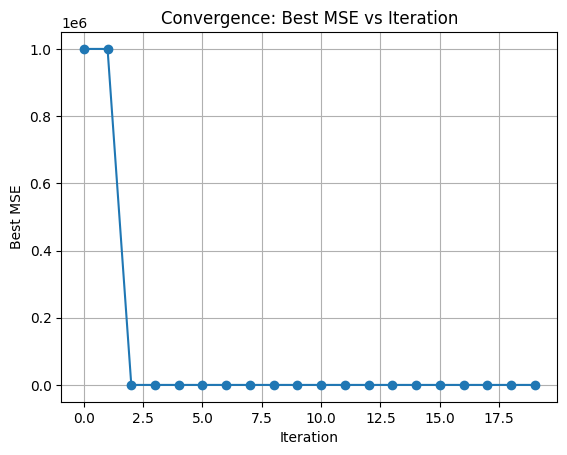


Best Configuration:
Distance Threshold: 0.046
Hidden Layer Size: 26
Validation MSE: 2.30108


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error
from scipy.optimize import Bounds
import matplotlib.pyplot as plt
import dcor
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# --- Simulated data: Replace with your actual df ---
np.random.seed(0)
n_samples = 1000
n_features = 40
X = np.random.rand(n_samples, n_features)
Y = np.random.rand(n_samples, 4)  # 4 targets

# Scale
scaler_x = StandardScaler().fit(X)
scaler_y = StandardScaler().fit(Y)
X_scaled = scaler_x.transform(X)
Y_scaled = scaler_y.transform(Y)

# --- Feature selection function ---
def dcor_filter(X, y, threshold):
    selected = []
    for i in range(X.shape[1]):
        corr = dcor.distance_correlation(X[:, i], y)
        if corr >= threshold:
            selected.append(i)
    return X[:, selected], selected

# --- Evaluation function (for optimizer) ---
def mlp_multi_eval(x, *args):
    threshold = x[0]
    hidden_size = int(x[1] * 190 + 10)

    X, Y = args
    X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

    # Use distance correlation on each output, take union of selected features
    selected_indices = set()
    for i in range(Y.shape[1]):
        _, idxs = dcor_filter(X_train, Y_train[:, i], threshold)
        selected_indices.update(idxs)

    if len(selected_indices) == 0:
        return [1e6]  # penalty

    selected_indices = sorted(list(selected_indices))
    X_train_sel = X_train[:, selected_indices]
    X_val_sel = X_val[:, selected_indices]

    base_model = MLPRegressor(hidden_layer_sizes=(hidden_size,), max_iter=500)
    model = MultiOutputRegressor(base_model, n_jobs=-1)  # Parallel

    model.fit(X_train_sel, Y_train)
    Y_pred = model.predict(X_val_sel)
    error = mean_squared_error(Y_val, Y_pred)
    return [error]

# --- Bayesian Optimization Class (Simplified) ---
class SimpleBO:
    def __init__(self, func, bounds, args):
        self.func = func
        self.bounds = bounds
        self.args = args
        self.xs = []
        self.ys = []

    def random_search(self, trials=20):
        for i in range(trials):
            x = np.random.uniform(self.bounds.lb, self.bounds.ub)
            y = self.func(x, *self.args)
            self.xs.append(x)
            self.ys.append(y[0])
            print(f"Trial {i+1:02d} | x: {x.round(3)} | MSE: {y[0]:.5f}")

    def plot_convergence(self):
        import matplotlib.pyplot as plt
        best_so_far = np.minimum.accumulate(self.ys)
        plt.plot(best_so_far, marker='o')
        plt.title("Convergence: Best MSE vs Iteration")
        plt.xlabel("Iteration")
        plt.ylabel("Best MSE")
        plt.grid(True)
        plt.show()

# --- Setup bounds and run optimization ---
lb = np.array([0.0, 0.0])  # threshold, layer size
ub = np.array([1.0, 1.0])
bounds = Bounds(lb, ub)

bo = SimpleBO(mlp_multi_eval, bounds, args=(X_scaled, Y_scaled))
bo.random_search(trials=20)
bo.plot_convergence()

# --- Report best configuration ---
best_idx = np.argmin(bo.ys)
best_x = bo.xs[best_idx]
print("\nBest Configuration:")
print(f"Distance Threshold: {best_x[0]:.3f}")
print(f"Hidden Layer Size: {int(best_x[1] * 190 + 10)}")
print(f"Validation MSE: {bo.ys[best_idx]:.5f}")


In [59]:
import numpy as np
import pandas as pd
import torch
import gpytorch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from scipy.optimize import Bounds
from joblib import Parallel, delayed
import dcor
import time
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from omegaconf import OmegaConf
from pathlib import Path

# Load the configuration file
config_path = "config_work.yaml"  # Replace with the path to your config file
config = OmegaConf.load(config_path)

# Extract the hotcold file path from the config
scaled_data_file = config.get("df_encoded", None)

# Check if the file exists
if scaled_data_file and Path(scaled_data_file).is_file():
    # Load the hotcold file
    df = pd.read_csv(scaled_data_file)
    print("Encoded df file loaded successfully.")
else:
    print(f"Error: Encoded df file not found at {scaled_data_file}")

# === Load and preprocess data ===

#df = pd.read_csv("df_encoded.csv")

selected_features = [  # your feature list
    'surfaceProcessingLocationCavity', 'hotRunner', 'hotRunnerCost',
    'manufacturingCost', 'mouldValidationCost', 'designTime',
    'hourlyDesignCost', 'removedChassis', 'weightChassisProcessed',
    'surfaceProcessingLocationChassis', 'removedCavity', 'numberOfCavities',
    'weightCavityProcessed', 'weightMould', 'totalDistance',
    'injectedMaterial_product', 'injectedMaterialCost',
    'percentageRecycledMaterial', 'maxDepth', 'maxWallThickness',
    'productVolume', 'materozzaVolume', 'nProdottiAnno', 'materialDensity',
    'tolerance', 'surfaceFinishing', 'machineCycleTime', 'maintenanceCost',
    'productionCost', 'injectedMaterial_materozza',
    'injectionMouldingProcess', 'steelPrice', 'mouldMaterialName',
    'machineName', 'EUUSMacchina', 'CNMacchina', 'setupTime',
    'deliveryVolume', 'deliveryPeriod'
]
target_columns = ['Cost', 'resources - total', 'human health - total', 'ecosystem quality - total']

X_raw = df[selected_features].values
Y_raw = df[target_columns].values

scaler_x = MinMaxScaler()
X_scaled = scaler_x.fit_transform(X_raw)

scaler_y = MinMaxScaler()
Y_scaled = scaler_y.fit_transform(Y_raw)

# === Distance correlation filter ===
def dcor_filter(X, y, threshold):
    selected = []
    for i in range(X.shape[1]):
        corr = np.mean([dcor.distance_correlation(X[:, i], y[:, j]) for j in range(y.shape[1])])
        if corr >= threshold:
            selected.append(i)
    return X[:, selected], selected

# === Multi-objective evaluator (MSE + training time) ===
def mlp_eval_multiobj(x_batch, *args):
    X_full, y_full = args
    results = []
    for x in x_batch:
        threshold = x[0]
        hidden_size = int(x[1] * (200 - 10) + 10)
        X_train, X_val, y_train, y_val = train_test_split(X_full, y_full, test_size=0.2)

        X_sel, selected = dcor_filter(X_train, y_train, threshold)
        if X_sel.shape[1] == 0:
            results.append([1e6, 1e3])
            continue

        X_val_sel = X_val[:, selected]
        model = MLPRegressor(hidden_layer_sizes=(hidden_size,), max_iter=300, random_state=0)
        
        start_time = time.time()
        model.fit(X_sel, y_train)
        duration = time.time() - start_time

        y_pred = model.predict(X_val_sel)
        mse = mean_squared_error(y_val, y_pred)
        results.append([mse, duration])
    return results

# === Dummy ref model ===
def ref_model(x_batch, *args):
    return np.zeros((x_batch.shape[0], 2))

# === Sparse GP model with GPyTorch ===
class SparseGPModel(gpytorch.models.ApproximateGP):
    def __init__(self, inducing_points):
        variational_distribution = gpytorch.variational.CholeskyVariationalDistribution(inducing_points.size(0))
        variational_strategy = gpytorch.variational.VariationalStrategy(
            self, inducing_points, variational_distribution, learn_inducing_locations=True
        )
        super().__init__(variational_strategy)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

# === Train Sparse GP ===
def train_gp_model(x_train, y_train):
    x_train = torch.tensor(x_train, dtype=torch.float32)
    y_train = torch.tensor(y_train, dtype=torch.float32)

    # Use subset of training data as inducing points
    inducing_points = x_train[:min(128, len(x_train))]

    model = SparseGPModel(inducing_points)
    likelihood = gpytorch.likelihoods.GaussianLikelihood()
    model.train()
    likelihood.train()

    optimizer = torch.optim.Adam([
        {'params': model.parameters()},
        {'params': likelihood.parameters()},
    ], lr=0.01)

    mll = gpytorch.mlls.VariationalELBO(likelihood, model, num_data=y_train.size(0))

    for i in range(100):
        optimizer.zero_grad()
        output = model(x_train)
        loss = -mll(output, y_train)
        loss.backward()
        optimizer.step()

    return model, likelihood

# === Run a VPBO-like loop ===
def vpbo_sparsegp(trials=10):
    X = []
    Y = []

    dim = 2
    bounds = Bounds([0, 0], [1, 1])

    for i in range(trials):
        x = np.random.uniform(bounds.lb, bounds.ub, (8, dim))
        y = mlp_eval_multiobj(x, X_scaled, Y_scaled)
        X.extend(x)
        Y.extend(y)

        X_arr = np.array(X)
        Y_arr = np.array(Y)

        print(f"Trial {i+1}/{trials}: Best MSE = {np.min(Y_arr[:,0]):.4f}, Min Time = {np.min(Y_arr[:,1]):.4f}s")

    # Fit Sparse GPs on each objective
    model_mse, lk_mse = train_gp_model(X_arr, Y_arr[:, 0])
    model_time, lk_time = train_gp_model(X_arr, Y_arr[:, 1])

    return X_arr, Y_arr, model_mse, lk_mse, model_time, lk_time

# === Run the optimization ===
X_hist, Y_hist, model_mse, lik_mse, model_time, lik_time = vpbo_sparsegp(trials=15)

# === Plot convergence ===
plt.plot(np.minimum.accumulate(Y_hist[:, 0]), label='Best MSE')
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("Convergence of Multi-Objective VPBO")
plt.grid(True)
plt.tight_layout()
plt.show()

# Print best result
best_idx = np.argmin(Y_hist[:, 0])
best_input = X_hist[best_idx]
print("\n🎯 Best Hyperparameters Found:")
print(f"Distance Threshold: {best_input[0]:.3f}")
print(f"Hidden Layer Size: {int(best_input[1] * (200 - 10) + 10)}")
print(f"Validation MSE: {Y_hist[best_idx, 0]:.4f}")
print(f"Training Time: {Y_hist[best_idx, 1]:.4f} seconds")


Encoded df file loaded successfully.


SystemError: CPUDispatcher(<function _generate_distance_covariance_sqr_terms_avl_impl.<locals>._distance_covariance_sqr_terms_avl_impl at 0x0000023B3784D760>) returned a result with an exception set